HINEILL DAVID CÉSPEDES ESPINOZA - 20213704

PREGUNTA 1

PREGUNTA 2

Se tiene el siguiente sistema de diferencias:
y[n] − 1.3829y[n − 1] + 0.4128y[n − 2] = 0.0675x[n] + 0.1349x[n − 1] + 0.0675x[n − 2]
y una se˜nal obtenida de un EMG (Electromiograma), con 4 activaciones musculares, que se encuentra en el
archivo (EMG.npy).

b) Utilizando ecuaciones recursivas, calcule y grafique la respuesta al impulso unitario con x[n] = δ[n]
para −2 ≤ n ≤ 100 y y[−1] = 0 y y[−2] = 0. (1 pto)

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from scipy.signal import lfilter

#Funciones para correr la accion del sistema :

def respuesta_sistema_segundo_intento(signal , signal_idx):
    salida = np.concatenate( ( [0 ,  0], np.zeros(len(signal)-2))) #Agregamos los indices
    salida_idx = np.arange(signal_idx[0] -2,signal_idx[0] -2 + len(salida) )
    for i in range(len(signal)-2):
        salida[i+2] = 1.3829 *salida[i+1] -0.4128* salida[i] + 0.0675*signal[i+2] + 0.1349*signal[i+1] + 0.0675*signal[i]
    return [salida_idx ,salida]

def respuesta_sistema(signal,signal_idx ):
    signal = np.concatenate((np.array([0 ,  0]) , signal ))
    salida = np.zeros(len(signal))
    salida_idx = []
    signal_idx = np.concatenate((np.array([signal_idx[0]-2 , signal_idx[0]-1 ]) ,  signal_idx))
    for i in signal_idx:
        #Dado que usamos los indices de la señal estos no necesariamente coinciden con los del arreglo  (q empiezan en cero)
        k = i -signal_idx[0]
        if k>=2:
            salida[k]  = 1.3829* salida[k-1] -0.4128* salida[k-2] + 0.0675*signal[k] + 0.1349*signal[k-1] + 0.0675* signal[k-2] 
            salida_idx.append(i)
        else:
            salida[k]  = 0.0675*signal[k] + 0.1349*signal[k-1] + 0.0675* signal[k-2]
            salida_idx.append(i)
    return [signal_idx ,salida ]

def plotear(idx, x, title):
    plt.figure(figsize=(10, 6))
    (markerline, stemlines, baseline) = plt.stem(idx,x, linefmt='-.', markerfmt='o', basefmt='-', use_line_collection=True)

    plt.setp(stemlines, color='blue', linestyle='-', linewidth=2)  

    plt.setp(baseline, color='green', linewidth=1.5, linestyle='--') 

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('n', fontsize=14)
    plt.ylabel('Amplitud', fontsize=14)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.xlim(-1, 100)
    plt.ylim(1.5* np.min(x),1.5*np.max(x) )
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


C:\Users\Hineill\AppData\Local\Temp\ipykernel_40432\161872031.py:34: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(idx,x, linefmt='-.', markerfmt='o', basefmt='-', use_line_collection=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


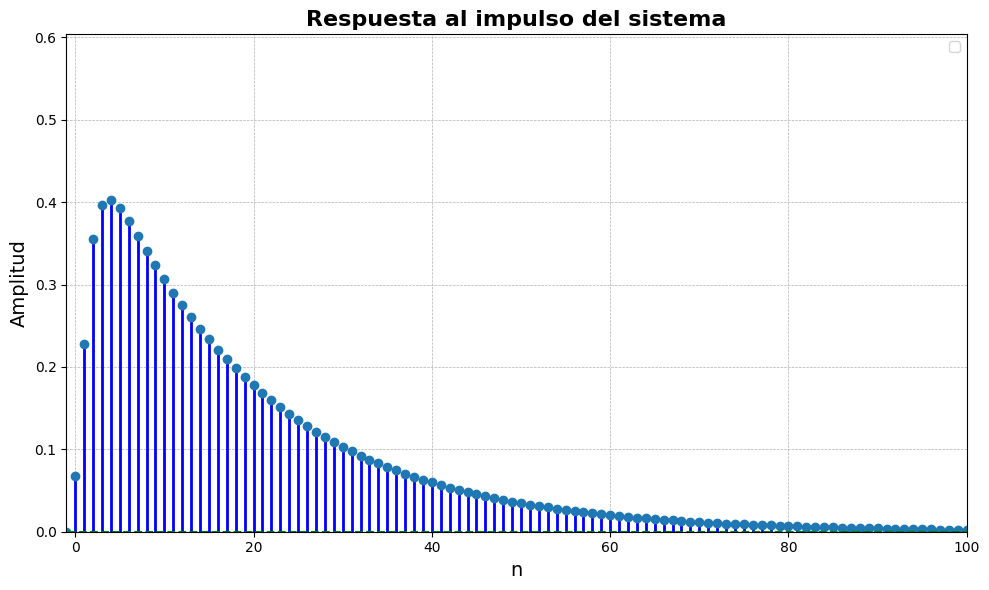

In [153]:
#Definimos la entrada como impulso
N_samples =102
dirac_signal =  np.zeros(N_samples)
dirac_signal[0] =1
dirac_signal_idx =  np.arange(len(dirac_signal))
[respuesta_impulso_idx , respuesta_impulso] =  respuesta_sistema(dirac_signal ,dirac_signal_idx)
#PLOTEAMOS
plotear(respuesta_impulso_idx,respuesta_impulso, "Respuesta al impulso del sistema")
respuesta_impulso = respuesta_impulso[2:]

In [154]:
#Comparamos con lfilter
coeficiente_y = [1, -1.3829 , 0.4128]
coeficiente_x = [0.0675, 0.1349,0.0675]
respuesta_impulso_lfilter = lfilter(coeficiente_x,coeficiente_y,dirac_signal)
np.allclose(respuesta_impulso_lfilter[:len(respuesta_impulso)],respuesta_impulso)
#Se podría afirmar q se implemento correctamente el filtro

True

c) Cargue la se˜nal EMG usando el comando np.load() y utilizando ecuaciones recursivas, calcule y grafique
la respuesta a una entrada x[n] = EMGsignal[n] con condiciones iniciales y[−1] = 0 y y[−2] = 0.
Analice el resultado obtenido y comp´arelo con la se˜nal original, ¿qu´e efecto produjo la aplicaci´on de la
ecuaci´on sobre la se˜nal?. (1 pto)


[   -2    -1     0 ... 19997 19998 19999]
[ 0.          0.          0.12125559 ...  0.1115804  -0.02318158
 -0.19635185]


<StemContainer object of 3 artists>

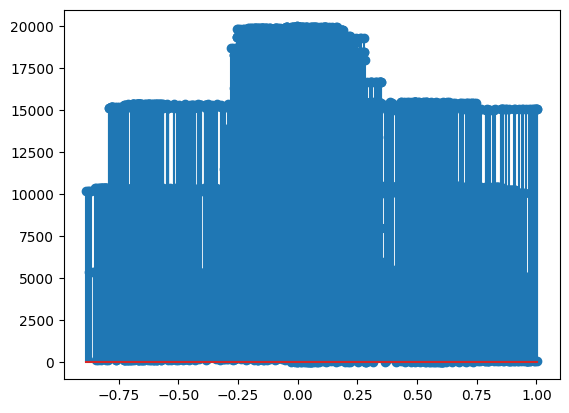

In [51]:
emg_signal = np.load('EMG.npy')
#plt.stem(np.arange(len(emg_signal)) ,emg_signal )

[salida_emg, salida_emg_idx ]= respuesta_sistema(emg_signal,np.arange(len(emg_signal)) )
plt.stem(salida_emg_idx ,salida_emg)

<StemContainer object of 3 artists>

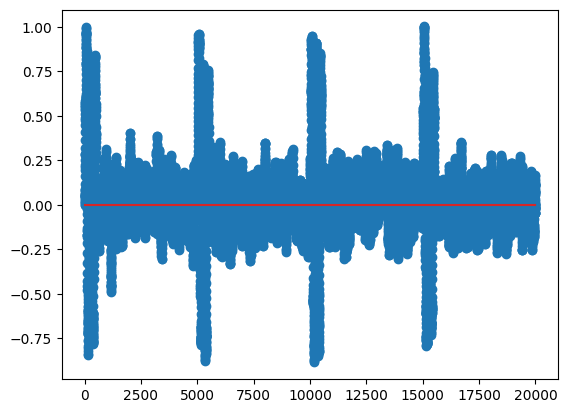

In [56]:
ola = lfilter([0.0675 , 0.1349, 0.0675], [1 , -1.3829, 0.4128] , emg_signal)
plt.stem(np.arange(len(ola)) , ola)

d) Utilizando la respuesta al impulso obtenida previamente, calcule y grafique la convoluci´on de la entrada
x[n] = EMGsignal[n] con la respuesta al impulso del sistema. Compare este resultado con la respuesta
obtenida por las ecuaciones recursivas en el punto anterior. (1 pto)


<StemContainer object of 3 artists>

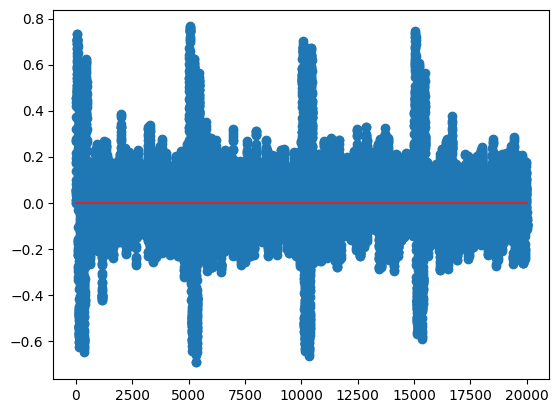

In [54]:
ola = np.convolve(emg_signal,respuesta_impulso ,mode="same")
plt.stem(np.arange(len(ola)) , ola)

e) Grafique los polos y ceros de la funci´on de transferencia en el plano z. Indique si el sistema es BIBO
estable. (1 pto)

In [ ]:
#H_z = 

PREGUNTA 3

a) Determine las funciones de transferencia H(z) y G(z) asociadas a las respuestas al impulso h[n] y g[n],
respectivamente. Halle la ROC de ambas funciones de transferencia. (1 pto)

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym

In [242]:
#Calculamos Hz
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
H_z  =  sym.Sum((sym.Rational(3,10)**k )*(z)**(-k) + (  sym.Rational(7,10) **k )*(z)**(-k) , (k,0,sym.oo)) +  1 #Sumamos 1 por la deltaDirac
Hz = H_z.doit()
H_Z_supreme = (Hz.args[1]).args[0][0]  + (Hz.args[2]).args[0][0]  + (Hz.args[0])
ROCh = sym.And(  (Hz.args[1]).args[0][1]  ,   (Hz.args[2]).args[0][1] ) 
print(f"------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------")
sym.simplify(H_Z_supreme)

------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------


(300*z**2 - 200*z + 21)/(100*z**2 - 100*z + 21)

In [243]:
print(f"------------------ROC de   H(Z) --------------------")
sym.simplify(ROCh)

------------------ROC de   H(Z) --------------------


1/Abs(z) < 10/7

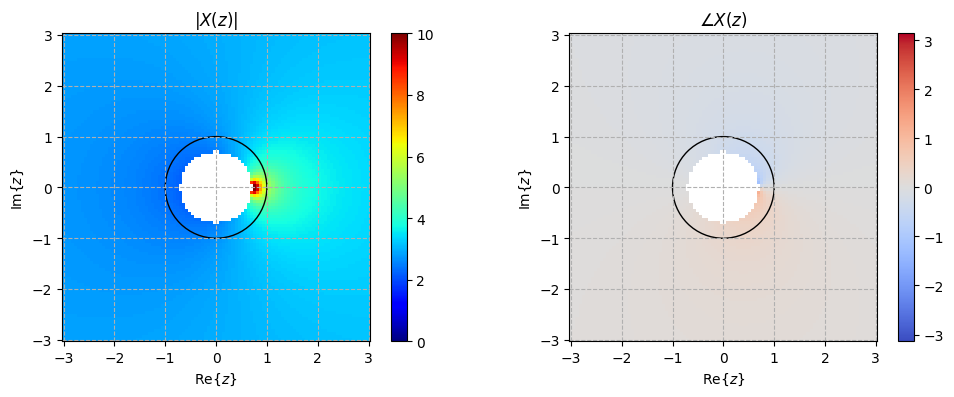

In [244]:
rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)
rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii
ROC = np.abs(zz)>np.abs(0.7)
H_Z =  1/(1-0.7 * (zz**-1)) + 1/(1-0.3 * (zz**-1)) + 1 #Escribimos una expresión
H_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(H_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|X(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)

im = ax2.pcolormesh(rz,iz,np.angle(H_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle X(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)

In [246]:
#------------------------------CALCULAMOS G_Z----------------------------------------
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
G_z  =  sym.Sum(   (  1 + (-1)**k )*(sym.Rational(12,10) **k)*(z)**(-k) + k*(  sym.Rational(9,10) **k )*(z)**(-k) , (k,0,sym.oo)) #Sumamos 1 por la deltaDirac
G_z = G_z.doit()
print("-----------------Funcion de transferencia G(z) -------------")
G_z_supreme = (G_z.args[1]).args[0][0] +  (G_z.args[0]).args[0][0] + (G_z.args[2]).args[0][0]
sym.simplify(G_z_supreme)

-----------------Funcion de transferencia G(z) -------------


10*z*(500*z**3 - 675*z**2 + 405*z - 324)/(2500*z**4 - 4500*z**3 - 1575*z**2 + 6480*z - 2916)

In [247]:
print(f"------------------ROC de   G(Z) --------------------")
ROCg = sym.And( (G_z.args[1]).args[0][1] ,  (G_z.args[0]).args[0][1] , (G_z.args[2]).args[0][1]) 
ROCg

------------------ROC de   G(Z) --------------------


(1/Abs(z) < 5/6) & (1/Abs(z) < 10/9)

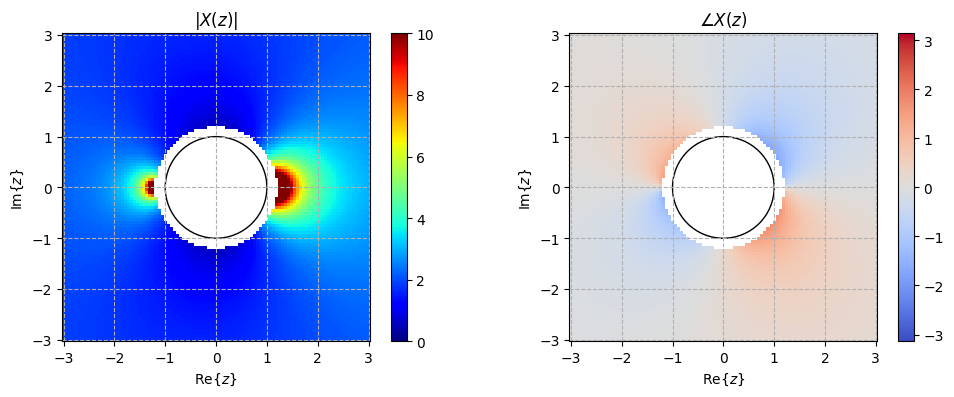

In [248]:
rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)
rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii

ROC1 = np.abs(zz)>np.abs(1.2)
ROC2 = np.abs(zz)>np.abs(0.9)
ROC =  np.logical_and(ROC1,ROC2)

G_Z =  10 * zz *(500*zz**3 -675 *zz**2 + 405*zz -324) / (2500 * zz**4  - 4500 * zz**3 - 1575 * zz**2 + 6480 *zz - 2916 )
#Escribimos una expresión
G_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(G_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|X(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)

im = ax2.pcolormesh(rz,iz,np.angle(G_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle X(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)

b) Utilizando la funci´on roots de Matlab o la funci´on roots de la librer´ıa numpy en Python, obtenga
los polos y ceros de H(z) y G(z) y graf´ıquelos en el plano z. A partir de los polos, ceros y ROCs,
determine si los sistemas son estables. (1 pto)

In [279]:
#ANEXO 
from matplotlib import patches
def plotearZerosPolos(polos,zeros,titulo, filename=None):
    ax = plt.subplot(111)
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    p = polos
    z = zeros
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
    markeredgecolor='k', markerfacecolor='g')
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
    markeredgecolor='r', markerfacecolor='r')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    plt.title(titulo)
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    return z, p, k

In [280]:
#------------------Función de transferencia G(z)-----------------------------"
sym.simplify(G_z_supreme)

10*z*(500*z**3 - 675*z**2 + 405*z - 324)/(2500*z**4 - 4500*z**3 - 1575*z**2 + 6480*z - 2916)

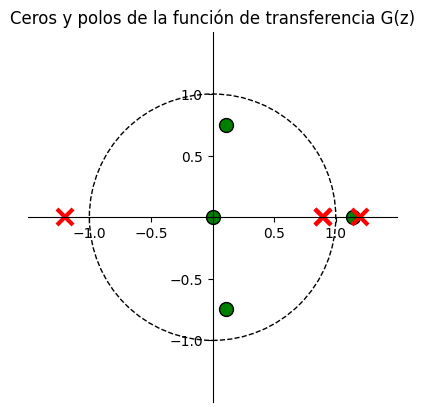

G(z) tiene zeros en: 
z = (1.13847386703157+0j)
z = (0.1057630664842148+0.746992101155731j)
z = (0.1057630664842148-0.746992101155731j)
z = 0j
G(z) tiene polos en: 
z = (-1.2000000000000008+0j)
z = (1.1999999999999962+0j)
z = (0.9000000000000006+2.105558292099748e-08j)
z = (0.9000000000000006-2.105558292099748e-08j)


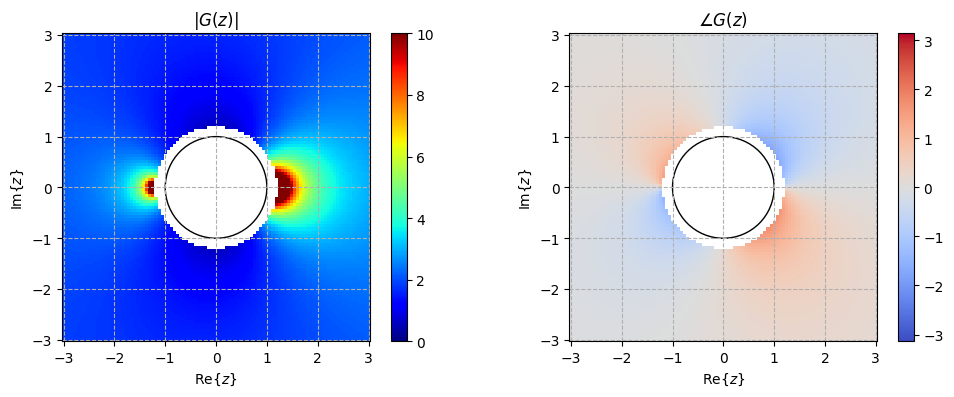

In [282]:
zeros_g = np.roots(np.convolve([10 , 0], [500 , -675 , 405, -324]))
polos_g = np.roots([2500 , -4500 , -1575 , 6480 , -2916])
plotearZerosPolos(polos_g, zeros_g , "Ceros y polos de la función de transferencia G(z)" )
print("G(z) tiene zeros en: ")
for i  in zeros_g:
    print(f"z = {i}")
print("G(z) tiene polos en: ")
for i  in polos_g:
    print(f"z = {i}")
    
rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)
rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii

ROC1 = np.abs(zz)>np.abs(1.2)
ROC2 = np.abs(zz)>np.abs(0.9)
ROC =  np.logical_and(ROC1,ROC2)

G_Z =  10 * zz *(500*zz**3 -675 *zz**2 + 405*zz -324) / (2500 * zz**4  - 4500 * zz**3 - 1575 * zz**2 + 6480 *zz - 2916 )
#Escribimos una expresión
G_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(G_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|G(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)

im = ax2.pcolormesh(rz,iz,np.angle(G_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle G(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)



Analisis de G(z)

In [283]:
#------------------Función de transferencia H(z)-----------------------------"
sym.simplify(H_Z_supreme)

(300*z**2 - 200*z + 21)/(100*z**2 - 100*z + 21)

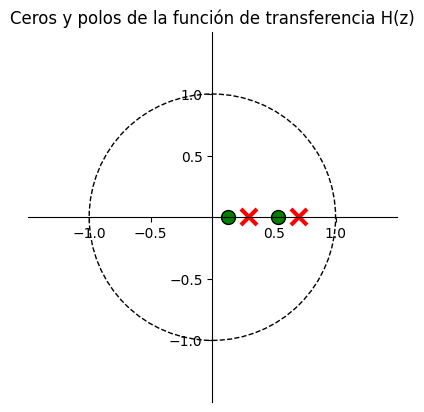

H(z) tiene zeros en: 
z = (1.13847386703157+0j)
z = (0.1057630664842148+0.746992101155731j)
z = (0.1057630664842148-0.746992101155731j)
z = 0j
H(z) tiene polos en: 
z = (-1.2000000000000008+0j)
z = (1.1999999999999962+0j)
z = (0.9000000000000006+2.105558292099748e-08j)
z = (0.9000000000000006-2.105558292099748e-08j)


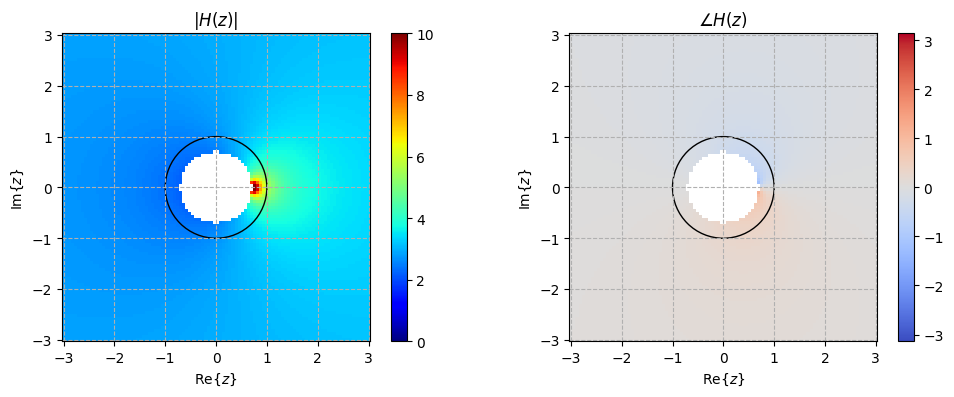

In [287]:
zeros_h = np.roots([300 , -200 , 21])
polos_h = np.roots([100 , -100 , 21])
plotearZerosPolos(polos_h, zeros_h , "Ceros y polos de la función de transferencia H(z)" )
print("H(z) tiene zeros en: ")
for i  in zeros_g:
    print(f"z = {i}")
print("H(z) tiene polos en: ")
for i  in polos_g:
    print(f"z = {i}")
    
rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)
rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii
ROC = np.abs(zz)>np.abs(0.7)
H_Z =  1/(1-0.7 * (zz**-1)) + 1/(1-0.3 * (zz**-1)) + 1 #Escribimos una expresión
H_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(H_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|H(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)

im = ax2.pcolormesh(rz,iz,np.angle(H_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle H(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)

c) Grafique las respuestas al escal´on unitario de ambos sistemas para las primeras 200 muestras 0 ≤ n ≤
199 usando los coeficientes de la funci´on de transferencia (Sugerencia: Investigue el comando lfilter
de scipy.signal). Comente la relaci´on con el an´alisis realizado en los puntos anteriores. (1 pto)

In [293]:
from scipy.signal import lfilter
Funcion_total = H_Z_supreme * G_z_supreme
sym.simplify(Funcion_total)

10*z*(150000*z**5 - 302500*z**4 + 267000*z**3 - 192375*z**2 + 73305*z - 6804)/(250000*z**6 - 700000*z**5 + 345000*z**4 + 711000*z**3 - 972675*z**2 + 427680*z - 61236)

<StemContainer object of 3 artists>

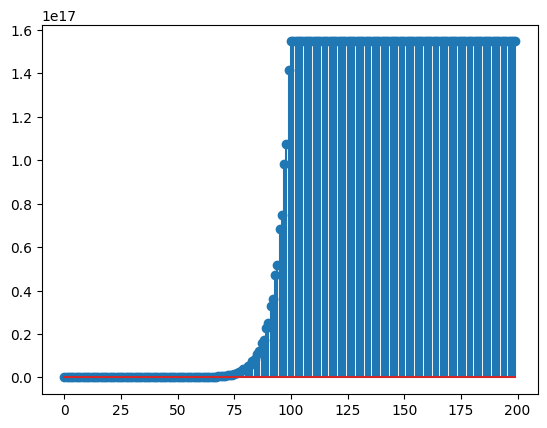

In [6]:
N = 200
signal_idx = np.arange(N)
signal = np.zeros(N)
signal[0] = 1
unit_step = np.ones(N)
arriba = 10* np.array([15e4 , -302500 , 267000 , -192375 , 73305 , -6804 , 0])
abajo = np.array([25e4 , -7e5 , 345e3 , 711e3 , -972675 , 427680 , -61236])
respuesta_impulso_sistema = lfilter(arriba , abajo ,signal)
resputa_escalon = np.convolve(unit_step , respuesta_impulso_sistema , 'same')
plt.stem(signal_idx ,resputa_escalon)